# An introduction to Groundwater Modeling
## Part 2. Two-dimensional flow

<img src="figs/part_of_cover_bakker_post.png" width="800px"> 

In [1]:
# Before starting we need to import NumPy and Matplotlib and set some defaults
import numpy as np
import matplotlib.pyplot as plt
# and set some parameters to make the figures look good
plt.rcParams["figure.autolayout"] = True # same as tight_layout after every plot
plt.rcParams["figure.figsize"] = (9, 3.5) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rc('font', size=12)

# Solution 4. Flow to a pumping well on an island with infiltration

Consider a pumping well with discharge $Q$ at the center of a circular island of radius $R$. The aquifer is unconfined with hydraulic conductivity $k$ and base elevation $z_b$. The water level is fixed at the edge of the island to $h_R$. The recharge on the island is uniform and equal to $N$. Note that the discharge $Q$ is positive when the well is pumping water out of the aquifer and the recharge $N$ is positive when water is entering the aquifer. 

<img src="figs/merged_nbs6_17_0.png" width="400px">  

The solution for the discharge potential is
\begin{equation}
\Phi = -\frac{1}{4}N (r^2-R^2) + \frac{Q}{4\pi} \ln{(r^2/R^2)}
+\Phi_R
\end{equation}
where $\Phi_R=\tfrac{1}{2} k  (h_R - z_b)^2$

The head in the aquifer is computed from the discharge potential as
\begin{equation}
h = z_b + \sqrt{\frac{2\Phi}{k}}
\end{equation}

As a first example, the discharge of the well is half the total recharge on the island 
$Q = N \pi R^2 / 2$. The head in the well is equal to the head at $r=r_w$, where $r_w$ is the radius of the well. 

In [2]:
# parameters
k = 5 # hydraulic conductivity, m/d
zb = 0 # bottom elevation of aquifer, m
N = 0.001 # areal recharge, m/d
R = 200 # radius of the island, m
hR = 10  # head at edge of island, m
rw = 0.3 # well radius, m
Q = 0.5 * N * np.pi * R ** 2  # discharge is half total recharge, m^3/d
print(f'Discharge of well: {Q:.2f} m^3/d')

Discharge of well: 62.83 m^3/d


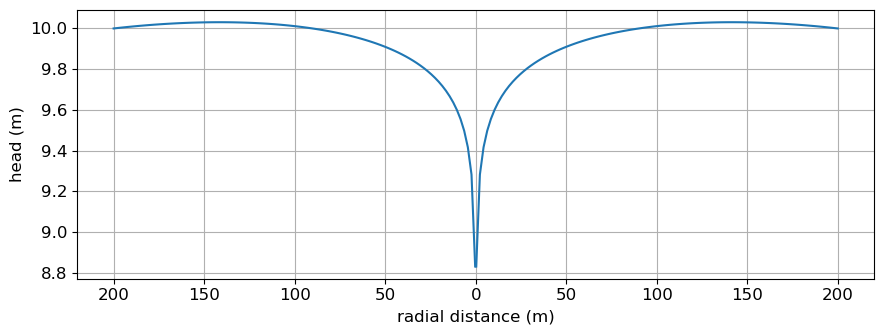

In [3]:
# solution
r = np.linspace(rw, R, 100)
phiR = 0.5 * k * (hR - zb) ** 2
phi = -N / 4 * (r ** 2 - R ** 2) + Q / (4 * np.pi) * np.log(r ** 2 / R ** 2) + phiR
h = zb + np.sqrt(2 * phi / k)
# plot
plt.plot(r, h, 'C0')
plt.plot(-r, h, 'C0')
plt.xlabel('radial distance (m)')
plt.ylabel('head (m)')
plt.xticks(np.arange(-200, 201, 50), np.abs(np.arange(-200, 201, 50))) # positive r ticks
plt.grid()

## Exercise 6
Compute the head in the well when the discharge is equal to half the total recharge on the island and when the discharge is equal to exactly the total recharge on the island. Plot the head vs. $r$ for both cases in one graph. Also include the case that $Q=0$. 

Head in well (Q = 0): 10.1980 m
Head in well (Q = half total recharge): 8.8312 m
Head in well (Q = total recharge): 7.2098 m


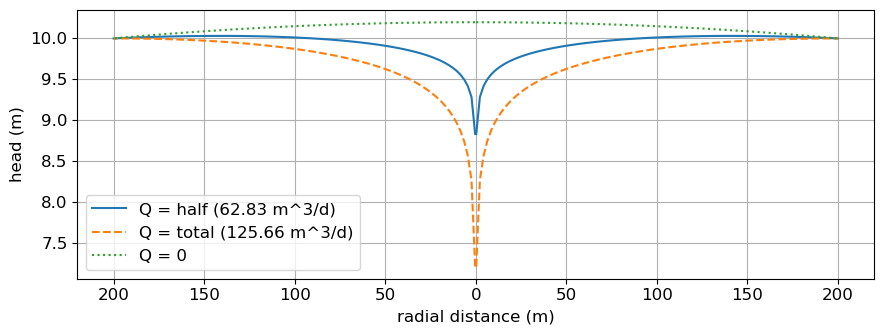

In [8]:
# compute heads for three Q-cases: Q=0, Q=half total recharge, Q=total recharge
Q_half = 0.5 * N * np.pi * R ** 2
Q_full = N * np.pi * R ** 2
Q_zero = 0.0

# function to compute head from phi for given Q
def head_from_phi(r, Q):
    phi = -N / 4 * (r ** 2 - R ** 2) + Q / (4 * np.pi) * np.log(r ** 2 / R ** 2) + phiR
    h_calc = zb + np.sqrt(2 * phi / k)
    return h_calc

h_half = head_from_phi(r, Q_half)
h_full = head_from_phi(r, Q_full)
h_zero = head_from_phi(r, Q_zero)

# head in the well (at r = rw)
h_half_well = h_half[0]
h_full_well = h_full[0]
h_zero_well = h_zero[0]
print(f'Head in well (Q = 0): {h_zero_well:.4f} m')
print(f'Head in well (Q = half total recharge): {h_half_well:.4f} m')
print(f'Head in well (Q = total recharge): {h_full_well:.4f} m')

# plot
plt.plot(r, h_half, label=f'Q = half ({Q_half:.2f} m^3/d)', color='C0')
plt.plot(-r, h_half, color='C0')
plt.plot(r, h_full, label=f'Q = total ({Q_full:.2f} m^3/d)', color='C1', linestyle='--')
plt.plot(-r, h_full, color='C1', linestyle='--')
plt.plot(r, h_zero, label='Q = 0', color='C2', linestyle=':')
plt.plot(-r, h_zero, color='C2', linestyle=':')
plt.xlabel('radial distance (m)')
plt.ylabel('head (m)')
plt.xticks(np.arange(-R, R+1, 50), np.abs(np.arange(-R, R+1, 50)))
plt.legend()
plt.grid()

## Exercise 7
What is the (theoretically) maximum discharge of the well? What happens when you try to compute the head in the well when the discharge is larger than the maximum discharge?

In [13]:
Q_max = N * np.pi * R ** 2

Q_values = [0.5 * Q_max, Q_max, 2 * Q_max]
for Q in Q_values:
    h_well = head_from_phi(rw, Q)
    print(f"Q = {Q:.2f} m³/d, Head in well: {h_well:.4f} m")

Q = 62.83 m³/d, Head in well: 8.8312 m
Q = 125.66 m³/d, Head in well: 7.2098 m
Q = 251.33 m³/d, Head in well: nan m


C:\Users\Move\AppData\Local\Temp\ipykernel_37016\221305107.py:9: RuntimeWarning: invalid value encountered in sqrt
  h_calc = zb + np.sqrt(2 * phi / k)


<div style="color:blue">

Answer: 

If we try to compute the head in the well for Q > Q_max, Theoretically, the formula for head in the well will give a negative value inside the square root, resulting in a complex (non-physical) number. Physically, this means the well is pumping more water than is supplied by recharge, so the aquifer would be completely depleted at the well.

</div>

# Solution 5. A pumping well near a river

A well is located near a long and straight river running North-South along the $y$-axis. The well is located on the left side of the river at $(x_w,y_w)$ and has a discharge $Q$ (see Figure). The river is in full hydraulic contact with the aquifer so that the head in the aquifer is equal to the river stage $h_0$ along the river. The aquifer is unconfined, but the variation of the saturated thickness is neglected: the transmissivity of the aquifer is approximated as constant and equal to $T$. Far away from the well, he head in the aquifer is relatively flat and equal to $h_0$. 

<img src="figs/wellriver.png" width="350px">

The solution for the head and flow in the aquifer is obtained with the method of images as:

\begin{equation}
h = \frac{Q}{4\pi T}\ln\left[\frac{(x-x_w)^2 + (y-y_w)^2}{(x+x_w)^2 + (y-y_w)^2}\right] + h_0
\end{equation}

\begin{equation}
Q_x = -T\frac{\partial h}{\partial x} = -\frac{Q}{2\pi}\left[\frac{x-x_w}{(x-x_w)^2 + (y-y_w)^2} - \frac{x+x_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}
\begin{equation}
Q_y = -T\frac{\partial h}{\partial y} = -\frac{Q}{2\pi}\left[\frac{y-y_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{y-y_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}

In [ ]:
def head(x, y, xw, yw, Q, T, h0):
    h = Q / (4 * np.pi * T) * np.log(
    ((x - xw) ** 2 + (y - yw) ** 2) /
    ((x + xw) ** 2 + (y - yw) ** 2)) + h0
    return h

def QxQy(x, y, xw, yw, Q):
    r1sq = (x - xw) ** 2 + (y - yw) ** 2
    r2sq = (x + xw) ** 2 + (y - yw) ** 2
    Qx = -Q / (2 * np.pi) * ((x - xw) / r1sq - (x + xw) / r2sq)
    Qy = -Q / (2 * np.pi) * ((y - yw) / r1sq - (y - yw) / r2sq)
    return np.array([Qx, Qy])

An example is provided below.

In [ ]:
# parameters
k = 10 # hydraulic conductivity, m/d
H = 20 # m
xw = -50 # x-location of well, m
yw = 0 # y-location of well, m
Q = 800 # discharge of well, m^3/d
rw = 0.3 # radius of well, m
h0 = 20 # river level, m
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d

The head is computed on a grid of 100 by 100 points where $x$ varies from $-100$ to $100$ and $y$ varies from $-50$ to $+50$. 

In [ ]:
xg, yg = np.meshgrid(np.linspace(-100, 0, 100), np.linspace(-50, 50, 100))
h = head(xg, yg, xw, yw, Q, T, h0)
print(f'min and max head in model window: {h.min():.1f} m, {h.max():.1f} m')

The head is contoured. First, a figure is created with the `subplot` command. The first argument is `121`, which means a figure with 1 row of graphs, 2 graphs, and start with graph 1 (the left graph; the rigth graph will be created in the next code block). The keyword `aspect=1` is important, as it makes the scale along the $x$ and $y$ axes equal, so that a circle looks like a circle rather than an ellipse.  The `contour` function returns a contour set, which is stored in the variable `cs`. Labels are placed along the contours by passing `cs` to the `clabel` function. The format of the labels is defined ast `'%1.1f'`, wich stands for a float with 1 decimal place.

In [ ]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, levels=np.arange(15, 21, 0.2), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8); # blue line for river

The flow field is visualized using the `streamplot` function. First, $Q_x$ and $Q_y$ are computed on the same grid as usef for the head. Then the `streamplot` function is used; the `density` keyword is set to control the density of streampaths. 

In [ ]:
Qx, Qy = QxQy(xg, yg, xw, yw, Q)
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(15, 21, 0.2), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.') # black dot at location of well
plt.axvline(0, color='skyblue', lw=8); # blue line for river
#
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy, color='C1', density=0.9)
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

Alternatively, the `streamplot` function may be used to start a number of streamlines from specified starting points. In the code cell below, 20 starting points are defined, equally distributed along the circumference of the well, and integrated in the `backward` direction (i.e., against the flow). 

In [ ]:
plt.subplot(111, aspect=1)
xstart = xw + rw * np.cos(np.arange(0, 2 * np.pi, 2 * np.pi / 20))
ystart = yw + rw * np.sin(np.arange(0, 2 * np.pi, 2 * np.pi / 20))
plt.subplot(111, aspect=1)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='backward')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

## Travel time from the river to the well
The travel time may be computed through integration of the velocity vector along a streamline. This is somewhat complicated, as the strealine is curved. It is straighforward, however, for the straight streamline starting at $(x,y)=(0,0)$ (recall that $y_w=0$) on the river and flowing towards the well. This travel time represents the shortest travel time from the river to the well, which is important to assess the funerability of the well to possible contamination by pathogens in the river water.  
\begin{equation}
v_x = \frac{Q_x}{nH} = \frac{\text{d}x}{\text{d}t}
\end{equation}
\begin{equation}
t = \int_{a}^{b}\frac{\text{d}x}{v_x}
\end{equation}
The integral may computed numerically, for example use the `quad` function.

In [ ]:
def integrand(x, y, xw, yw, Q, H=10, n=0.3):
    Qx, Qy = QxQy(x, y, xw, yw, Q)
    vx = Qx / (n * H)
    return 1 / vx

In [ ]:
from scipy.integrate import quad
traveltime = quad(integrand, a=0, b=xw + rw, args=(yw, xw, yw, Q))[0]
print(f'shortest travel time from river to well: {traveltime:.1f} d')

## Exercise 8
Move the well farther away from the river such that the shortest travel time from the river to the well is at least 40 days. Print the new location of the well and the corresponding shortest travel time to the screen.

# Solution 6. A pumping well near a river in uniform background flow

In virtually all aquifers, the natural groundwater flow is towards a stream, river, lake, or ocean. This flow is also called the background flow, as it is present prior to the installation of a well. The background flow may be estimated, e.g., from the heads in two observation wells. For example, the flow in the $x$-direction may be obtained from two obsevation wells aligned in the $x$-direction as
\begin{equation}
U\approx T\frac{\Delta h}{\Delta x}
\end{equation}
where $\Delta h$ is the head drop between the observation wells and $\Delta x$ is the distance between the two observation wells. 

Here, we are considering a pumping well near a long and straight river running North-South (as in the previous solution), but now with a uniform background flow in the $x$-direction, as shown in the Figure.

<img src="figs/wellriveruflow.png" width="350px"> 

The solution for the head in the aquifer is obtained from the previous solution by adding a uniform flow term in the $x$-direction. The solutions for the head and flow are

\begin{equation}
h = \frac{Q}{4\pi T}\ln\left[\frac{(x-x_w)^2 + (y-y_w)^2}{(x+x_w)^2 + (y-y_w)^2}\right] 
-\frac{U}{T}x + h_0
\end{equation}

\begin{equation}
Q_x = -\frac{Q}{2\pi}\left[\frac{x-x_w}{(x-x_w)^2 + (y-y_w)^2} - \frac{x+x_w}{(x+x_w)^2 + (y-y_w)^2} \right] + U
\end{equation}
\begin{equation}
Q_y = -\frac{Q}{2\pi}\left[\frac{y-y_w}{(x-x_w)^2 + (y-y_w)^2} - 
\frac{y-y_w}{(x+x_w)^2 + (y-y_w)^2} \right]
\end{equation}

Consider a well in a uniform background flow near a river. The well is a bit farther from the river and has a somewhat smaller discharge than in the previous example.

In [ ]:
# parameters
k = 20 # hydraulic conductivity, m/d
H = 10 # m
xw = -200 # x-location of well, m
yw = 0 # y-location of well, m
Q = 200 # discharge of well, m^3/d
rw = 0.3 # radius of well, m
h0 = 20 # river level, m
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d

In [ ]:
# parameters uniform background flow
delx = 1000 # distance between observation wells
delh = 2 # head drop between observation wells
U = T * delh / delx
print(f'Uniform flow U = {U:.1f} m^2/d')

In [ ]:
def head(x, y, xw, yw, Q, T, h0, U=0):
    h = Q / (4 * np.pi * T) * np.log(
    ((x - xw) ** 2 + (y - yw) ** 2) /
    ((x + xw) ** 2 + (y - yw) ** 2)) -U * x / T + h0
    return h

def QxQy(x, y, xw, yw, Q, U=0):
    r1sq = (x - xw) ** 2 + (y - yw) ** 2
    r2sq = (x + xw) ** 2 + (y - yw) ** 2
    Qx = -Q / (2 * np.pi) * ((x - xw) / r1sq - (x + xw) / r2sq) + U
    Qy = -Q / (2 * np.pi) * ((y - yw) / r1sq - (y - yw) / r2sq)
    return Qx, Qy

The head is contoured and a streamplot is created. 20 streamlines are started from $x=-600$ m, equally distribute between $y=-30$ and $y=+30$.

In [ ]:
xg, yg = np.meshgrid(np.linspace(-600, 0, 100), np.linspace(-300, 300, 100))
h = head(xg, yg, xw, yw, Q, T, h0, U)
print(f'min and max head in window: {h.min():.1f} m, {h.max():.1f} m')
Qx, Qy = QxQy(xg, yg, xw, yw, Q, U)

In [ ]:
plt.subplot(121, aspect=1)
cs = plt.contour(xg, yg, h, np.arange(19, 22, 0.1), colors='C0')
plt.clabel(cs, fmt='%1.1f')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
#
plt.subplot(122, aspect=1)
xstart = -600 * np.ones(20)
ystart = np.linspace(-300, 300, 20)
for i in range(20):
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xstart[i], ystart[i])], 
                   integration_direction='forward')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8);

There appears to be a stagnation point (a point with zero velocity) between the well and the river. This point may be found by setting $Q_x=0$ along the line $y=y_w$ and solving for $x$, which gives the location $x_s$ of the stagnation point:
\begin{equation}
x_s = -\sqrt{x_w^2 + \frac{Qx_w}{\pi U}}
\end{equation}
Two streampath are started from the stagnation point, one just above the stagnation point and one just below the stagnation point. The streampaths are integrated `backward`, so against the flow. These two strealines bound the capture zone envelope, the area of the aquifer that is (eventually) captured by the well. Note that far upstream the width of the capture zone envelope is $W=Q/U$.

In [ ]:
xs = -np.sqrt(xw ** 2 + Q * xw / (np.pi * U))
plt.subplot(121, aspect=1)
plt.contour(xg, yg, h, np.arange(19, 22, 0.1), colors='C0')
for ystart in [0.1, -0.1]:
    plt.streamplot(xg, yg, Qx, Qy, start_points=[(xs, ystart)], 
                   integration_direction='backward', color='k')
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
print(f'width of capture zone envelope far upstream: {Q / U:.1f} m')

### Exercise 9
Consider a well located in a uniform flow field near a river running North-South, as in the previous example. Near the well is a contaminated area as shown in the figure below (run the code cell). For the current discharge of the well ($Q=200$ m$^3$/d), the well captures water from the contaminated area, as can be seen, e.g., by starting a streampath from the corner of the contaminated area. The discharge of the well must be decreased such that it doesn't capture water from the contaminated area. Determine and print to the screen the maximum discharge of the well such that the well doesn't capture water from the contaminated area.

In [ ]:
# run this code cell to see the contaminated area
plt.subplot(121, aspect=1)
plt.plot(xw, yw, 'k.')
plt.axvline(0, color='skyblue', lw=8)
plt.fill([-300, -100, -100, -300], [100, 100, 300, 300], color='pink')
plt.text(-200, 200, 'contaminated', ha='center', va='center', rotation=-45)
plt.xlim(-600, 0)
plt.ylim(-300, 300)
plt.grid()